# Identificando y modelando relaciones entre más de dos variables

![correlation](https://upload.wikimedia.org/wikipedia/en/7/78/Correlation_plots_of_double_knockout_distribution_across_subsystems_in_M.tb_and_E.coli.png)

> Como vimos anteriormente, el coeficiente de correlación se calcula por pares de variables, y es bastante útil para identificar cuando dos variables están relacionadas. 

> Una vez identificamos la relación entre dos variables, digamos $x$ (independiente / explicativa) y $y$ (dependiente / objetivo), vimos un método para modelar esta relación, con el cual podemos predecir el valor de la variable objetivo $y$ ante un nuevo valor de la variable explicativa $x$.

> Pero, ¿Qué pasa si la variable objetivo depende de más de una variable explicativa $x$?

# 1. Visualizando la correlación entre múltiples variables

Incluso con dos variables, vimos que al calcular la correlación obteníamos una matriz:

In [1]:
# Importar pandas
import pandas as pd

In [2]:
# Cargamos datos de las casas
data = pd.read_csv("house_pricing.csv")

In [3]:
data

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [4]:
# Corrleación entre precio y tamaño
data[['size', 'price']].corr()

,size,price
size,1.000000,0.854988
price,0.854988,1.000000


La interpretación de esta matriz es sencilla. La entrada $i$, $j$ corresponde  la correlación de la variable $i$ con la variable $j$.

En general, podemos calcular esta matriz para un número arbitrario de variables:

In [5]:
# Matriz de correlación entre las variables de número de cuartos, tamaño y precio
data.corr()

,size,n_bedrooms,price
size,1.000000,0.559967,0.854988
n_bedrooms,0.559967,1.000000,0.442261
price,0.854988,0.442261,1.000000


Para este ejemplo particular, dado que tenemos pocos datos, es fácil identificar las relaciones observando directamente los números de la matriz. Sin embargo, cuando tenemos muchas variables, resulta complejo visualizar todas las correlaciones numéricas entre pares de variables.

Una manera práctica de identificar la relación entre más de dos variables es por medio de una visualización por mapa de calor:

In [6]:
# Importamos seaborn
import seaborn as sns

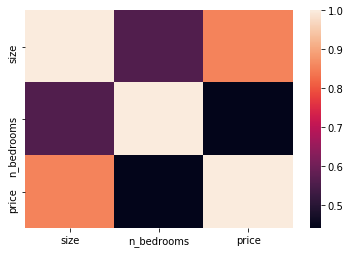

In [7]:
# Mapa de calor de correlaciones
sns.heatmap(data.corr())

Veamos un ejemplo con más variables [Boston house prices dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html):

In [8]:
# Dataset de precios de casas en Boston
from sklearn.datasets import load_boston

In [9]:
# Encapsulamos en un data frame
d = load_boston()
df = pd.DataFrame(data=d['data'], columns=d['feature_names'])
df['PRICE'] = d['target']

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
import numpy as np

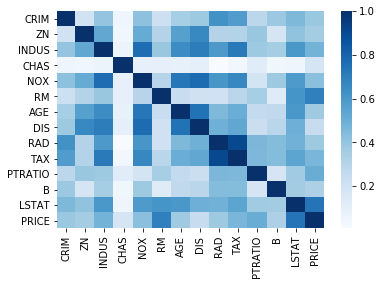

In [17]:
# Mapa de calor de correlaciones
corr = np.abs(df.corr())
sns.heatmap(corr, cmap='Blues')

# 2. Regresión lineal con múltiples variables

El modelo de regresión lineal que vimos con una variable es fácilmente generalizable para considerar múltiples variables.

En el caso de dos variables, el objetivo de la regresión lineal es encontrar un modelo de un plano:

$$
y = \alpha_0 + \alpha_1 x^1 + \alpha_2 x^2
$$

que **"mejor" (en el sentido de mínimos cuadrados) se ajuste a los puntos**.

Matemáticamente, si los puntos son

$$
\{(x^1_1, x^2_1, y_1), (x^1_2, x^2_2, y_2), \dots, (x^1_n, x^2_n, y_n)\},
$$

lo que queremos es estimar los valores de los parámetros $m$ y $b$ que minimizan la siguiente función:

$$
J(m, b) = \sum_{i=1}^{n}(y_i - \alpha_0 - \alpha_1 x^1_i - \alpha_2 x^2_i)^2
$$

La buena noticia es que el código no se modifica en lo absoluto:

In [18]:
# Importar sklearn.linear_model.LinearRegression
from sklearn.linear_model import LinearRegression

In [19]:
# Ajustar el mejor plano a los datos de precios vs. tamaños, número de recámaras
model2 = LinearRegression().fit(data[['size', 'n_bedrooms']], data['price'])

In [20]:
# Obtener parámetros ajustados
model2.coef_, model2.intercept_

(array([  139.21067402, -8738.01911233]), 89597.90954279754)

Podemos comparar los scores ($R^2$: % de variación que explica el modelo) de ambos modelos:

In [23]:
# Coeficiente de determinación de modelo con una variable
model = LinearRegression().fit(data[['size']], data['price'])
model.score(data[['size']], data['price'])

0.7310037839755306

In [24]:
# Coeficiente de determinación de modelo con dos variables
model2.score(data[['size', 'n_bedrooms']], data['price'])

0.7329450180289143

### ¡De esta manera, podemos incluir en nuestro sistema de avalúos automáticos, la variable de número de cuartos!